<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/dstep23_dsny_trash_part1_rvichot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Dept of Sanitation in NYC, Part 1: working with time-based data**

*September 26, 2023*

This notebook (along with Part 2) will explore two questions related to waste removal by New York City's Department of Sanitation:

- ***What is the relationship between refuse and recycling?***

- ***Is there periodicity in the tonnage data?***

The data can be found [here](https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5).

---

#### **Time Series Data in Python**

First, let's read in the data using the `parse_dates` keyword.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# -- set the filename and read the data while parsing the MONTH column
fname = "https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD"
dsny  = pd.read_csv(fname, parse_dates=["MONTH"])

In [3]:
dsny

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1993-11-01,Manhattan,01,625.2,119.4,34.4,NaN,NaN,NaN,NaN,1.0
1,1992-03-01,Manhattan,01,726.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1995-08-01,Manhattan,01,627.5,82.4,35.6,NaN,NaN,NaN,NaN,1.0
3,1991-08-01,Manhattan,01,695.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1995-09-01,Manhattan,01,633.1,117.2,45.8,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
23173,2019-02-01,Bronx,06,1921.2,117.2,167.9,10.6,29.7,NaN,NaN,2.0
23174,2018-10-01,Bronx,06,2281.1,145.2,215.7,8.1,73.9,NaN,NaN,2.0
23175,2017-12-01,Bronx,06,2087.1,132.1,165.0,NaN,41.2,NaN,NaN,2.0
23176,2019-04-01,Bronx,06,2246.0,144.8,195.8,12.1,34.7,NaN,NaN,2.0


Notice the data type of the `"MONTH"` column:

In [4]:
type(dsny["MONTH"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
dsny["MONTH"].iloc[0]

Timestamp('1993-11-01 00:00:00')

In [6]:
# -- show dtypes for the dataframe
dsny.dtypes

MONTH                  datetime64[ns]
BOROUGH                        object
COMMUNITYDISTRICT              object
REFUSETONSCOLLECTED           float64
PAPERTONSCOLLECTED            float64
MGPTONSCOLLECTED              float64
RESORGANICSTONS               float64
SCHOOLORGANICTONS             float64
LEAVESORGANICTONS             float64
XMASTREETONS                  float64
BOROUGH_ID                    float64
dtype: object

To figure out how this data is sorted, we can display it as usual:

In [7]:
# -- display the DSNY data
dsny

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1993-11-01,Manhattan,01,625.2,119.4,34.4,NaN,NaN,NaN,NaN,1.0
1,1992-03-01,Manhattan,01,726.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1995-08-01,Manhattan,01,627.5,82.4,35.6,NaN,NaN,NaN,NaN,1.0
3,1991-08-01,Manhattan,01,695.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1995-09-01,Manhattan,01,633.1,117.2,45.8,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
23173,2019-02-01,Bronx,06,1921.2,117.2,167.9,10.6,29.7,NaN,NaN,2.0
23174,2018-10-01,Bronx,06,2281.1,145.2,215.7,8.1,73.9,NaN,NaN,2.0
23175,2017-12-01,Bronx,06,2087.1,132.1,165.0,NaN,41.2,NaN,NaN,2.0
23176,2019-04-01,Bronx,06,2246.0,144.8,195.8,12.1,34.7,NaN,NaN,2.0


We want to focus on only the tons of refuse and recycling data, so let's select only the first 6 columns:

In [8]:
# -- sub-select only the first six columns
cols = dsny.columns[:6]
dsny = dsny[cols]

In [9]:
dsny.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED'],
      dtype='object')

In [10]:
# -- rename the columns for ease of use
dsny.columns = ["month", "borough", "district", "refuse", "paper", "mgp"]

Before diving into the individual boroughs, we can use our groupby method that we explored last week to get the total refuse for NYC by month:

In [12]:
# -- groupby month and sum
nyc_ts = dsny.groupby("month").sum()

<ipython-input-12-cfb07c430f53>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nyc_ts = dsny.groupby("month").sum()


In [13]:
nyc_ts

,refuse,paper,mgp
month,,,
1990-01-01,71.9,0.0,0.0
1990-06-01,11518.0,0.0,0.0
1990-07-01,15243.8,0.0,0.0
1990-08-01,31162.8,0.0,0.0
1990-09-01,34097.0,0.0,0.0
...,...,...,...
2023-05-01,223551.1,22331.0,24389.9
2023-06-01,215636.5,22600.9,24383.4
2023-07-01,211423.4,21901.8,23785.9


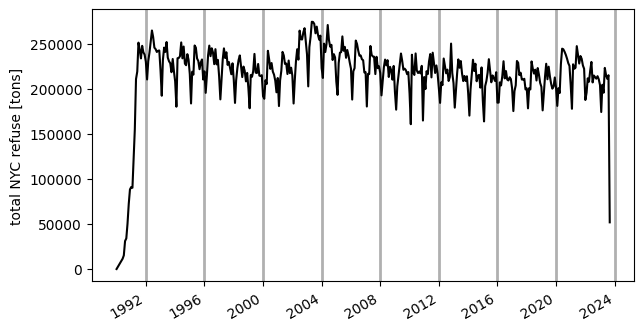

In [15]:
# -- plot it and add some vertical grid lines
fig, ax = plt.subplots(figsize=(7, 4))
nyc_ts.plot(y="refuse", use_index=True, color="k", legend=False, ax=ax)
ax.grid(axis="x", which="major", lw=2)
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("total NYC refuse [tons]")
fig.show()

Interestingly, it looks like there is some data incompleteness in the early 90s.  Let's restrict our study period to 1995 to 2019.  Datetime objects let us work with these limits fairly easily:

In [16]:
# -- let's concentrate on 1995 to 2019 (16 years)
ind_tlo = dsny["month"] >= "1995-01-01"
ind_thi = dsny["month"] < "2019-01-01"
ind_tot = ind_tlo & ind_thi
dsny = dsny[ind_tot]

In [19]:
dsny

,month,borough,district,refuse,paper,mgp
2,1995-08-01,Manhattan,01,627.5,82.4,35.6
4,1995-09-01,Manhattan,01,633.1,117.2,45.8
5,1996-04-01,Brooklyn,07,3478.8,279.2,301.6
6,2007-08-01,Brooklyn,07,3648.4,515.4,400.7
7,2012-01-01,Brooklyn,07,3156.7,436.6,343.4
...,...,...,...,...,...,...
23170,2015-09-01,Bronx,06,2133.9,134.4,174.8
23171,2017-11-01,Bronx,06,2213.2,132.6,189.2
23172,2017-07-01,Bronx,06,2143.5,118.8,177.1
23174,2018-10-01,Bronx,06,2281.1,145.2,215.7


<ipython-input-27-949feb4907bf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nyc_ts = dsny.groupby("month").sum()


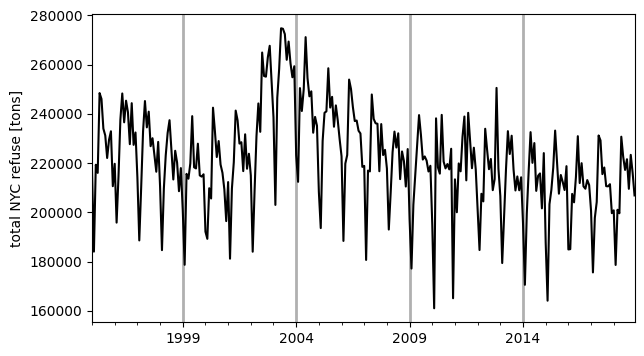

In [27]:
# -- groupby month and sum
nyc_ts = dsny.groupby("month").sum()

# -- plot it and add some vertical grid lines
fig, ax = plt.subplots(figsize=(7, 4))
nyc_ts.plot(use_index=True, y="refuse", color="k", legend=False, ax=ax)
ax.grid(axis="x", which="major", lw=2)
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("total NYC refuse [tons]")
fig.show()

In [29]:
# -- check for NaNs
dsny.isna().sum()

month          0
borough        0
district       0
refuse         0
paper        920
mgp         1226
dtype: int64

Notice there are some NaNs.  Let's **<u>assume</u>** that those are 0s.  But note this is a **choice**!

In [30]:
# -- convert NaNs to 0s
dsny = dsny.fillna(0.0)

In [31]:
# -- check NaNs again...
dsny.isna().sum()

month       0
borough     0
district    0
refuse      0
paper       0
mgp         0
dtype: int64

Let's replot total refuse over the whole city as well as recycling:

<ipython-input-45-c9d7c04bca47>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nyc_ts = dsny.groupby("month").sum()


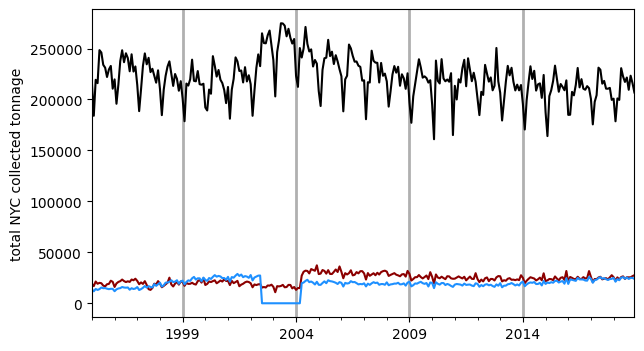

In [45]:
# -- groupby month and sum
nyc_ts = dsny.groupby("month").sum()

# -- plot it and add some vertical grid lines
fig, ax = plt.subplots(figsize=(7, 4))
nyc_ts.plot(use_index=True, y=["refuse", "paper", "mgp"], color=["k", "darkred", "dodgerblue"], legend=False, ax=ax)
ax.grid(axis="x", which="major", lw=2)
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("total NYC collected tonnage")
fig.show()

We can also do some more advanced gymnastics to compare boroughs:

In [46]:
dsny["borough"].unique()

array(['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx'],
      dtype=object)

In [47]:
# -- groupby borough and month
boro_ts = dsny.groupby(["borough", "month"]).sum()

<ipython-input-47-ceb0226e7633>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  boro_ts = dsny.groupby(["borough", "month"]).sum()


Notice that grouping ***twice*** resulted in a `MultiIndex`,

In [48]:
boro_ts

refuse   paper     mgp
borough       month                              
Bronx         1995-01-01  35950.9  1843.4  1691.3
              1995-02-01  32534.1  1588.9  1489.1
              1995-03-01  35877.8  2059.9  1833.0
              1995-04-01  34192.7  1967.0  1659.0
              1995-05-01  39393.6  1992.9  1733.0
...                           ...     ...     ...
Staten Island 2018-08-01  16279.1  2013.8  1985.0
              2018-09-01  14865.8  1931.9  1864.4
              2018-10-01  15848.1  1962.5  1895.5
              2018-11-01  15067.7  2125.1  1890.1
              2018-12-01  14586.9  2260.4  1792.0

[1440 rows x 3 columns]

In [49]:
# -- display MultiIndex
boro_ts.index

MultiIndex([(        'Bronx', '1995-01-01'),
            (        'Bronx', '1995-02-01'),
            (        'Bronx', '1995-03-01'),
            (        'Bronx', '1995-04-01'),
            (        'Bronx', '1995-05-01'),
            (        'Bronx', '1995-06-01'),
            (        'Bronx', '1995-07-01'),
            (        'Bronx', '1995-08-01'),
            (        'Bronx', '1995-09-01'),
            (        'Bronx', '1995-10-01'),
            ...
            ('Staten Island', '2018-03-01'),
            ('Staten Island', '2018-04-01'),
            ('Staten Island', '2018-05-01'),
            ('Staten Island', '2018-06-01'),
            ('Staten Island', '2018-07-01'),
            ('Staten Island', '2018-08-01'),
            ('Staten Island', '2018-09-01'),
            ('Staten Island', '2018-10-01'),
            ('Staten Island', '2018-11-01'),
            ('Staten Island', '2018-12-01')],
           names=['borough', 'month'], length=1440)

A `MutliIndex` can be "unstacked",

In [50]:
# -- unstack MultiIndex
boro_ts_us = boro_ts.unstack("borough")

resulting in multi-layer columns,

In [51]:
# -- display unstacked DataFrame
boro_ts_us

refuse                                             paper  \
borough       Bronx Brooklyn Manhattan   Queens Staten Island   Bronx   
month                                                                   
1995-01-01  35950.9  68093.6   43405.8  55780.9       13450.5  1843.4   
1995-02-01  32534.1  57274.5   37018.4  46424.7       10777.1  1588.9   
1995-03-01  35877.8  68928.4   41367.8  58804.4       14348.8  2059.9   
1995-04-01  34192.7  68515.8   38770.5  59213.0       15348.5  1967.0   
1995-05-01  39393.6  76344.1   43346.3  70695.8       18681.9  1992.9   
...             ...      ...       ...      ...           ...     ...   
2018-08-01  36289.4  70279.5   35336.5  63390.6       16279.1  2839.2   
2018-09-01  33309.9  68281.9   34916.5  58175.4       14865.8  2664.4   
2018-10-01  35313.1  72326.6   37786.3  62082.5       15848.1  2677.1   
2018-11-01  34978.8  69679.3   36225.1  60057.4       15067.7  2801.1   
2018-12-01  33934.3  67165.3   34951.1  56228.6       14586.9  2988.0   

                                                        mgp           \
borough    Brooklyn Manhattan  Queens Staten Island   Bronx Brooklyn   
month                                                                  
1995-01-01   5162.9    4741.4  5564.7        1880.7  1691.3   4425.3   
1995-02-01   4399.5    4669.6  4696.9        1556.2  1489.1   3733.8   
1995-03-01   5519.1    5752.8  5953.8        2048.9  1833.0   4519.2   
1995-04-01   4983.6    5209.1  5092.2        1913.9  1659.0   4286.8   
1995-05-01   5437.9    4827.0  5605.2        2175.7  1733.0   4429.4   
...             ...       ...     ...           ...     ...      ...   
2018-08-01   7647.8    6241.6  6810.3        2013.8  3895.6   7103.2   
2018-09-01   7818.3    6437.1  6577.6        1931.9  3562.8   6799.5   
2018-10-01   7779.3    6426.7  6632.7        1962.5  3783.3   7119.9   
2018-11-01   8098.2    6785.5  6849.8        2125.1  3705.3   7030.3   
2018-12-01   8326.5    6729.9  7238.4        2260.4  3541.7   6772.6   

                                            
borough    Manhattan  Queens Staten Island  
month                                       
1995-01-01    2555.5  4050.0        1004.1  
1995-02-01    2292.1  3387.6         826.8  
1995-03-01    2677.2  4001.7        1013.5  
1995-04-01    2437.1  3740.1         953.9  
1995-05-01    2519.3  4160.9        1060.0  
...              ...     ...           ...  
2018-08-01    4686.4  7653.2        1985.0  
2018-09-01    4441.6  7202.3        1864.4  
2018-10-01    4621.8  7448.5        1895.5  
2018-11-01    4925.0  7417.7        1890.1  
2018-12-01    4673.5  7063.2        1792.0  

[288 rows x 15 columns]

In [52]:
# -- display multi-layer columns
boro_ts_us.columns

MultiIndex([('refuse',         'Bronx'),
            ('refuse',      'Brooklyn'),
            ('refuse',     'Manhattan'),
            ('refuse',        'Queens'),
            ('refuse', 'Staten Island'),
            ( 'paper',         'Bronx'),
            ( 'paper',      'Brooklyn'),
            ( 'paper',     'Manhattan'),
            ( 'paper',        'Queens'),
            ( 'paper', 'Staten Island'),
            (   'mgp',         'Bronx'),
            (   'mgp',      'Brooklyn'),
            (   'mgp',     'Manhattan'),
            (   'mgp',        'Queens'),
            (   'mgp', 'Staten Island')],
           names=[None, 'borough'])

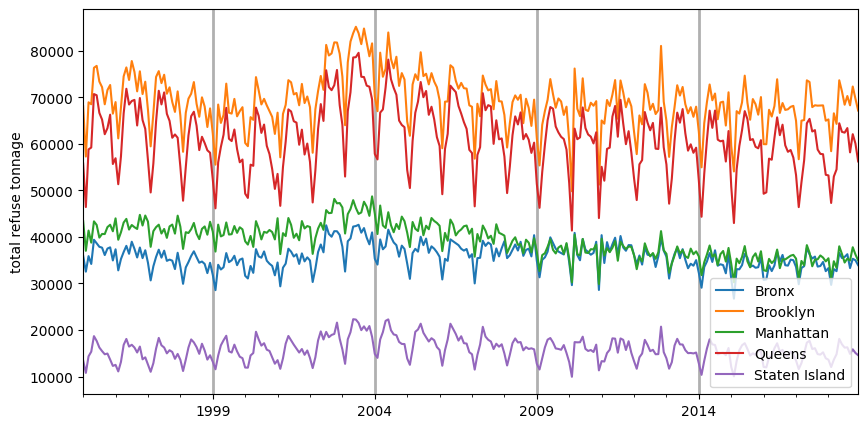

In [57]:
# -- plot each borough's refuse by unstacking
fig, ax = plt.subplots(figsize=(10, 5))
boro_ts_us.plot(use_index=True, y="refuse", legend=True, ax=ax)
ax.grid(axis="x", which="major", lw=2)
ax.legend(loc="lower right")
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("total refuse tonnage")
fig.show()

**ASIDE ON MERGING DATAFRAMES**

Let's answer an intermediate question: ***what is the total tons <u>per person</u> in January 2016?***

This will take 3 steps:

1. load [population by borough data](https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)
2. get the total tonnage for each borough in 01/01/2016
3. use the DataFrame's `.merge()` method to join the two DataFrames

In [64]:
# -- load population data
pname = "https://data.cityofnewyork.us/api/views/xywu-7bv9/rows.csv?accessType=DOWNLOAD"
bpop = pd.read_csv(pname)

# -- use only 2020 data
bpop = bpop.iloc[1:][["Borough", "2020"]]

# -- remove leading spaces
bpop["Borough"] = bpop["Borough"].str.replace(" ","")

In [65]:
bpop

,Borough,2020
1,Bronx,1446788
2,Brooklyn,2648452
3,Manhattan,1638281
4,Queens,2330295
5,StatenIsland,487155


In [67]:
# -- get total tonnage by borough for 01/01/2016
ind16 = dsny["month"] == "2016-01-01"
tot16 = dsny[ind16].groupby("borough").sum().reset_index()

# -- note, an alternative way to do this in one line (but also creates "month" column)


<ipython-input-67-4b4238055696>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tot16 = dsny[ind16].groupby("borough").sum().reset_index()


In [74]:
tot16

,borough,refuse,paper,mgp
0,Bronx,30764.3,2143.2,2677.4
1,Brooklyn,59938.6,5802.3,5075.6
2,Manhattan,32863.4,5440.6,4181.9
3,Queens,49282.2,5886.8,5623.0
4,Staten Island,12060.1,1591.2,1449.6


In [75]:
bpop

,Borough,2020
1,Bronx,1446788
2,Brooklyn,2648452
3,Manhattan,1638281
4,Queens,2330295
5,StatenIsland,487155


In [77]:
# -- merge the two DataFrames
tot16 = tot16.merge(bpop, left_on="borough", right_on="Borough")

In [78]:
# -- add column on total refuse per person
tot16["refuse_per_person"] = tot16["refuse"] / tot16["2020"]

In [79]:
tot16

,borough,refuse,paper,mgp,Borough,2020,refuse_per_person
0,Bronx,30764.3,2143.2,2677.4,Bronx,1446788,0.021264
1,Brooklyn,59938.6,5802.3,5075.6,Brooklyn,2648452,0.022632
2,Manhattan,32863.4,5440.6,4181.9,Manhattan,1638281,0.020060
3,Queens,49282.2,5886.8,5623.0,Queens,2330295,0.021148
